# Planning Stage: individual assignment 1

## 1. Data Description

### Data Description

The dataset assigned to our group is the Restaurant Tips Dataset, which contains 244 observations and 7 variables. It captures transactional data from a restaurant, recording details about the total bill, tip amount, gender of the payer, smoking preference, day of the week, meal time, and the size of the dining party. This dataset allows for an analysis of tipping behavior and its influencing factors.

### Dataset Summary

| Variable      | Type        | Description                                      |
|--------------|------------|--------------------------------------------------|
| total_bill   | Float      | Total amount of the bill (in dollars)           |
| tip          | Float      | Tip amount given (in dollars)                    |
| sex          | Categorical | Gender of the person paying (`Male`/`Female`)   |
| smoker       | Categorical | Whether the payer is a smoker (`Yes`/`No`)      |
| day          | Categorical | Day of the week (`Thur`, `Fri`, `Sat`, `Sun`)   |
| time         | Categorical | Meal time (`Lunch`/`Dinner`)                    |
| size         | Integer    | Number of people in the dining party            |

### Source and Information

The data has been collected from a restaurant over a period of time. Each row represents a unique transaction. The original dataset is publicly available on Kaggle, created by Saurabh Badole.

Citation: Kaggle - [Restaurant Tips Dataset](https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset?resource=download)

### Pre-selection of Variables

All variables are currently included in the dataset. However, some may be discarded during later stages of analysis:

- Variables to Consider Dropping: None at this stage, as all variables contribute to understanding tipping behavior.

- Potential Reasons for Exclusion in Future Analysis: If certain categorical variables (e.g., day, smoker) do not show significant relationships with tip amounts, they may be excluded to simplify the model.



## 2. Question

### Research Question

We want to investigate how different factors influence tipping behavior in restaurants. Specifically, we aim to answer: "What is the relationship between the tip amount and factors such as total bill amount, gender of the payer, smoking preference, day of the week, meal time, and party size? Do larger bills and bigger dining parties lead to higher tips, and does the payer’s gender or smoking status play a role?"

### The Response Variable:
- **Tip amount** (continuous variable) is our response variable, as we aim to understand what factors influence tipping behavior.

### Focus of the Analysis:
This study is primarily focused on **inference**, as we seek to determine which factors significantly impact tipping behavior. However, it also has a prediction component, as understanding these relationships can help forecast tip amounts based on customer characteristics and transaction details. Depending on the nature of the data, a **Multiple Linear Regression (MLR)** model may be appropriate for this analysis.


## 3. Exploratory Data Analysis and Visualization

### Data Preparation, Cleaning, and Visualization


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




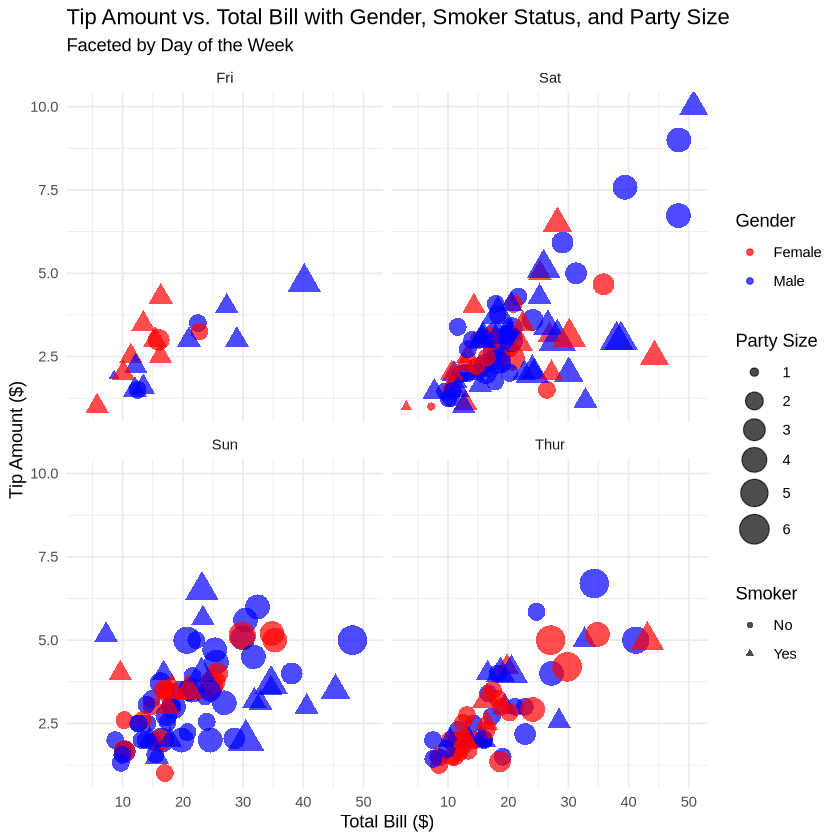

In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)

# Load the dataset
tips_df <- read.csv("tips.csv")

# Convert categorical variables to factors
tips_df$sex <- as.factor(tips_df$sex)
tips_df$smoker <- as.factor(tips_df$smoker)
tips_df$day <- as.factor(tips_df$day)
tips_df$time <- as.factor(tips_df$time)
tips_df$size <- as.factor(tips_df$size)

# Clean and wrangle the data into a tidy format - Ensure column names are consistent and remove any potential NA values
tips_df <- tips_df %>%
  rename(bill = total_bill, gender = sex, meal_time = time, party_size = size) %>%
  drop_na()

# A visualization exploring multiple variables
ggplot(tips_df, aes(x = bill, y = tip, color = gender, shape = smoker, size = party_size)) +
  geom_point(alpha = 0.7) +
  facet_wrap(~day) +  # Facet by day to explore weekly patterns
  scale_size(range = c(2, 8)) +
  scale_color_manual(values = c("Male" = "blue", "Female" = "red")) +
  labs(title = "Tip Amount vs. Total Bill with Gender, Smoker Status, and Party Size",
       subtitle = "Faceted by Day of the Week",
       x = "Total Bill ($)",
       y = "Tip Amount ($)",
       color = "Gender",
       shape = "Smoker",
       size = "Party Size") +
  theme_minimal() +
  theme(legend.position = "right")

### Data Cleaning and Wrangling

To prepare the dataset for analysis, the following steps were taken:

- Converted categorical variables (sex, smoker, day, time) into factors for proper handling in visualization.

- Renamed columns for clarity:

    - `total_bill` → `bill`

    - `sex` → `gender`

    - `time` → `meal_time`

    - `size` → `party_size`

- Handled missing values by removing any NA entries to ensure consistency.

### Proposed Visualization

A scatter plot was created to explore the relationship between tip amount and total bill, incorporating additional categorical information:

- **X-axis**: Total bill amount (`bill`)

- **Y-axis**: Tip amount (`tip`)

- **Color**: Gender of the payer (`gender`)

- **Shape**: Smoker status (`smoker`)

- **Size**: Party size (`party_size`)

**Faceted** by day of the week (`day`) to analyze potential patterns across different days.

### Interpretation of the Visualization

This visualization was chosen because it allows us to analyze multiple aspects of tipping behavior simultaneously. Key observations from the plot:

- Larger bills tend to have higher tips, but the percentage of tip varies.

- Gender differences in tipping behavior can be examined using color coding. There is no strong visual indication that one gender tips significantly more than the other.

- Smoker vs. non-smoker behavior in tipping is visualized using shape differentiation. The tipping patterns appear similar across smokers and non-smokers.

- Party size effects on tipping behavior are evident through point size variation. Larger groups tend to have larger total bills but do not always tip proportionally more.

- Day-wise analysis (faceting) helps identify potential trends:

    - Saturday and Sunday show more high-value bills and higher tips, suggesting a weekend effect.

    - Friday and Thursday have relatively smaller bills and tips, possibly due to lower restaurant traffic.

# Methods and Plan & Computational Code and Output (individual assignment 2)

## 1. Methods and Plan

To investigate the factors that influence tipping behavior, we will use a **multiple linear regression** model with `tip` as the response variable. The predictors will include both **numeric** variables like `total_bill` and `size`, as well as **categorical** variables such as `sex`, `smoker`, `day`, and `time`.

#### Why this method?
Multiple linear regression is appropriate because we aim to **predict a continuous outcome** (tip amount) using multiple explanatory variables of different types. It allows us to quantify and interpret the individual contribution of each factor while holding others constant.

#### Assumptions
This method assumes:
- A **linear relationship** between predictors and the response.
- **Independent observations**.
- **Homoscedasticity** (equal variance) of residuals.
- **Normally distributed** residuals.
- **No multicollinearity** among predictors.

#### Limitations
- If assumptions (like linearity or normality) are violated, the model may give biased or inefficient estimates.
- Categorical variables must be correctly encoded as factors.
- The model does not account for potential **interactions** unless explicitly included.

This method provides a straightforward yet powerful approach to understand and model tipping behavior using multiple factors.

## 2. Computational Code and Output

### Code

In [5]:
library(tidyverse)
library(broom)

# Fit Multiple Linear Regression model
tip_model <- lm(tip ~ bill + gender + smoker + day + meal_time + party_size, data = tips_df)

summary(tip_model)

# Table
tidy(tip_model)


Call:
lm(formula = tip ~ bill + gender + smoker + day + meal_time + 
    party_size, data = tips_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8475 -0.5729 -0.1026  0.4756  4.1076 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.803817   0.352702   2.279   0.0236 *  
bill            0.094487   0.009601   9.841   <2e-16 ***
genderMale     -0.032441   0.141612  -0.229   0.8190    
smokerYes      -0.086408   0.146587  -0.589   0.5561    
daySat         -0.121458   0.309742  -0.392   0.6953    
daySun         -0.025481   0.321298  -0.079   0.9369    
dayThur        -0.162259   0.393405  -0.412   0.6804    
meal_timeLunch  0.068129   0.444617   0.153   0.8783    
party_size      0.175992   0.089528   1.966   0.0505 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.024 on 235 degrees of freedom
Multiple R-squared:  0.4701,	Adjusted R-squared:  0.452 
F-statistic: 26.06 on 8 and 235 DF,  

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.80381728,0.352702401,2.27902413,2.356339e-02
bill,0.09448701,0.009601399,9.84096224,2.342526e-19
genderMale,-0.03244094,0.141612158,-0.22908302,8.190036e-01
smokerYes,-0.08640832,0.146587073,-0.58946753,5.561140e-01
daySat,-0.12145838,0.309742275,-0.39212722,6.953196e-01
daySun,-0.02548066,0.321297781,-0.07930543,9.368572e-01
dayThur,-0.16225920,0.393405344,-0.41244787,6.803872e-01
meal_timeLunch,0.06812860,0.444616858,0.15322991,8.783485e-01
party_size,0.17599200,0.089527743,1.96578175,5.050134e-02


### Interpretation

The multiple linear regression results indicate that **total bill** is a statistically significant and strong positive predictor of tip amount (p < 0.001), with an estimated increase of approximately $0.09 in tip per additional dollar spent. Other covariates, including **gender**, **smoker status**, **day of the week**, and **meal time**, were not statistically significant at the 5% level, suggesting limited explanatory power when controlling for other factors. The variable **party size** approached significance (p ≈ 0.050), indicating a potential positive association with tip amount. Overall, the model explains approximately **47% of the variance** in tip behavior (R² = 0.47), supporting the primary role of bill amount in predicting tips.

In [6]:
Chosen Variables: 

ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected symbol
1: Chosen Variables
           ^


bill
party_size
gender
smoker

In [7]:
library(tidyverse)

# Fit Multiple Linear Regression model
tip_model <- lm(tip ~ bill + gender + smoker + party_size, data = tips_df)

summary(tip_model)

# Table
tidy(tip_model)


Call:
lm(formula = tip ~ bill + gender + smoker + party_size, data = tips_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8916 -0.5738 -0.0594  0.4999  4.0661 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.722492   0.216231   3.341 0.000968 ***
bill         0.094106   0.009414   9.996  < 2e-16 ***
genderMale  -0.027263   0.137367  -0.198 0.842846    
smokerYes   -0.083711   0.138285  -0.605 0.545517    
party_size   0.180280   0.087980   2.049 0.041544 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.017 on 239 degrees of freedom
Multiple R-squared:  0.4688,	Adjusted R-squared:  0.4599 
F-statistic: 52.72 on 4 and 239 DF,  p-value: < 2.2e-16


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.72249201,0.216230636,3.3413027,9.675392e-04
bill,0.09410594,0.009414119,9.9962556,6.989427e-20
genderMale,-0.02726342,0.137367469,-0.1984707,8.428455e-01
smokerYes,-0.08371135,0.138284608,-0.6053555,5.455172e-01
party_size,0.18028013,0.087979940,2.0491049,4.154395e-02
